This is another example of deploying a CNN, this time on a subset of the Kasthuri data set.  This example is essentially the same as that for ISBI 2012, with a few cosmetic differences. 

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os, os.path, copy, logging, socket, time

import numpy as np
import pylab as plt

#from ndparse.algorithms import nddl as nddl
#import ndparse as ndp
sys.path.append('..'); import ndparse as ndp

try:
    logger
except:
    # do this precisely once
    logger = logging.getLogger("deploy_kast")
    logger.setLevel(logging.DEBUG)
    ch = logging.StreamHandler()
    ch.setFormatter(logging.Formatter('[%(asctime)s:%(name)s:%(levelname)s]  %(message)s'))
    logger.addHandler(ch)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Test data shape is: (100, 1, 1024, 1024)


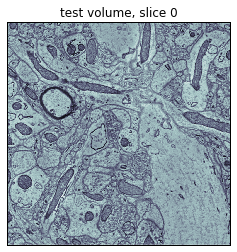

In [4]:
# note: the weight files choosen here are arbitrary.
w_membrane = os.path.join('membrane_weights', 'weights_epoch_001.h5') 
w_synapse = os.path.join('synapse_weights', 'weights_epoch_014.h5')

# load data (from local file - can replace with ndio call if desired)
data = np.load('deep_learning_kasthuri_example_data.npz')
X = data['Xtest']
X = np.transpose(X, [2, 0, 1]).astype(np.float32)
X = X[:,np.newaxis,:,:]

  
# show some details.  Note that data tensors are assumed to have dimensions:
#   (#slices, #channels, #rows, #columns)
#
print('Test data shape is: %s' % str(X.shape))
plt.imshow(X[0,0,...], interpolation='none', cmap='bone')
plt.title('test volume, slice 0')
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()

In [ ]:
# In the interest of time, only deploy on one slice (z-dimension) of the test volume 
# *and* only evaluate a subset of the pixels in that slice.
#
# Note: depending upon your system (e.g. CPU vs GPU) this may take a few minutes...
#
tic = time.time()
P_membrane_0 = ndp.nddl.fit(X, w_membrane, slices=[0,], evalPct=.1, log=logger)
print("Time to deploy: %0.2f sec" % (time.time() - tic))

# The shape of the probability estimate tensor is:
#    (#slices, #classes, #rows, #cols)
print('Class probabilities shape: %s' % str(P0.shape))

[2016-11-07 11:44:41,437:deploy_kast:WARNING]  No output file specified - are you sure this is what you want?
[2016-11-07 11:44:41,451:deploy_kast:INFO]  X volume dimensions: (1, 1, 1024, 1024)
INFO:deploy_kast:X volume dimensions: (1, 1, 1024, 1024)
[2016-11-07 11:44:41,452:deploy_kast:INFO]  X values min/max:    0, 1
INFO:deploy_kast:X values min/max:    0, 1
[2016-11-07 11:44:41,453:deploy_kast:INFO]  initializing CNN...
INFO:deploy_kast:initializing CNN...
[2016-11-07 11:44:41,770:deploy_kast:INFO]  evaluating volume...
INFO:deploy_kast:evaluating volume...
[2016-11-07 11:44:44,717:deploy_kast:INFO]  after masking, will evaluate 10.00% of data
INFO:deploy_kast:after masking, will evaluate 10.00% of data
[2016-11-07 11:44:46,887:deploy_kast:INFO]    last pixel [  0   0 989] (0.10% complete)
INFO:deploy_kast:  last pixel [  0   0 989] (0.10% complete)
[2016-11-07 11:46:47,217:deploy_kast:INFO]    last pixel [  0 340 839] (33.28% complete)
INFO:deploy_kast:  last pixel [  0 340 839] (

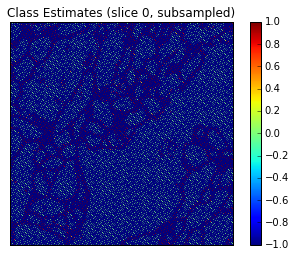

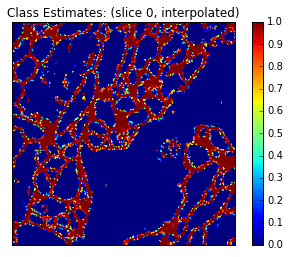

In [19]:
# Use a simple interpolation scheme to fill in "missing" values 
# (i.e. those pixels we did not evaluate using the CNN).
# 
P_membrane_int_0 = ndp.nddl.interpolate_nn(P_membrane_0)

# visualize
plt.imshow(P_membrane_0[0,0,...]); plt.colorbar()
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.title('Class Estimates (slice 0, subsampled)')
plt.show()

plt.imshow(P_membrane_int_0[0,0,...]); plt.colorbar()
plt.title('Class Estimates: (slice 0, interpolated)')
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()
